# Preprocessing

In [120]:
import numpy as np
import pandas as pd #Reading the dataframe
import matplotlib.pyplot as plt #Visualizing the data with histograms, scatterplots, count plots, etc.
import seaborn as sns #Correlation analysis via heatmaps
from sklearn.preprocessing import StandardScaler #Feature scaling
from sklearn.model_selection import train_test_split #Traintestsplit
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, accuracy_score

In [121]:
#Create the dataframe
df_pt8 = pd.read_csv('p8_behavior_center1000_key.csv')
df_pt9 = pd.read_csv('p9_behavior_center1000_key.csv')
df_pt10 = pd.read_csv('p10_behavior_center1000_key.csv')
df_pt11 = pd.read_csv('p11_behavior_center1000_key.csv')
df_pt12 = pd.read_csv('p12_behavior_center1000_key.csv')

In [122]:
print(df_pt8['correct'].value_counts())
print(df_pt9['correct'].value_counts()) 
print(df_pt10['correct'].value_counts())
print(df_pt11['correct'].value_counts())
print(df_pt12['correct'].value_counts())

correct
0    320
Name: count, dtype: int64
correct
0    320
Name: count, dtype: int64
correct
0    240
Name: count, dtype: int64
correct
0    240
Name: count, dtype: int64
correct
0    200
Name: count, dtype: int64


In [123]:
# List to hold DataFrames
dataframes = []
dataframes.append(df_pt8)
dataframes.append(df_pt9)
dataframes.append(df_pt10)
dataframes.append(df_pt11)
dataframes.append(df_pt12)

augmented_df = pd.concat(dataframes, ignore_index=True)
augmented_df.to_csv('augmented_behavior_datafile.csv', index=False)
augmented_df = augmented_df.drop('Unnamed: 0', axis=1)

In [124]:
#String-to-float conversion method
def time_string_to_seconds(time_str):
    if time_str.count(':') == 2:
        # Format HH:MM:SS.SSSS
        h, m, s = map(float, time_str.split(':'))
        return h * 3600 + m * 60 + s
    elif time_str.count(':') == 1:
        # Format MM:SS.S
        m, s = map(float, time_str.split(':'))
        return m * 60 + s
    else:
        raise ValueError("Time format not recognized")

In [125]:
#Adding reaction times column to dataframe
augmented_df['stim_time_seconds'] = augmented_df['stim_time'].apply(time_string_to_seconds)
augmented_df['stim_time_seconds'] = augmented_df['stim_time_seconds'].astype('float64')
augmented_df['key_time_seconds'] = augmented_df['key_time'].apply(time_string_to_seconds)
augmented_df['key_time_seconds'] = augmented_df['key_time_seconds'].astype('float64')

augmented_df['reaction_time'] = augmented_df['key_time_seconds'] - augmented_df['stim_time_seconds']
augmented_df['reaction_time'] = augmented_df['reaction_time'].astype('float64')

# EDA and Visualization

In [126]:
augmented_df.head()

,color,word,response,correct,congruent,stim_time,key_time,isi,start_experiment,end_experiment,stim_time_seconds,key_time_seconds,reaction_time
0,black,black,4,0,1,29:32.9,29:41.7,1.8,NaN,NaN,1772.9,1781.7,8.8
1,blue,blue,3,0,1,29:46.2,29:49.0,1.9,NaN,NaN,1786.2,1789.0,2.8
2,green,blue,2,0,0,29:53.6,29:55.1,1.8,NaN,NaN,1793.6,1795.1,1.5
3,black,black,2,0,1,29:59.6,30:04.7,2.0,NaN,NaN,1799.6,1804.7,5.1
4,blue,blue,3,0,1,30:09.4,30:11.1,2.2,NaN,NaN,1809.4,1811.1,1.7


In [127]:
augmented_df.tail()

,color,word,response,correct,congruent,stim_time,key_time,isi,start_experiment,end_experiment,stim_time_seconds,key_time_seconds,reaction_time
1315,green,red,2,0,0,10:10:2.3595,10:10:4.7445,1.4,NaN,NaN,36602.3595,36604.7445,2.3850
1316,blue,blue,3,0,1,10:10:8.3385,10:10:9.8359,1.3,NaN,NaN,36608.3385,36609.8359,1.4974
1317,black,black,4,0,1,10:10:13.2733,10:10:14.9246,1.6,NaN,NaN,36613.2733,36614.9246,1.6513
1318,red,red,1,0,1,10:10:18.6896,10:10:20.0327,1.4,NaN,NaN,36618.6896,36620.0327,1.3431
1319,red,red,1,0,1,10:10:23.5911,10:10:24.4295,1.6,20-May-2024 10:06:47.9273,20-May-2024 10:10:26.0438,36623.5911,36624.4295,0.8384


In [128]:
augmented_df['correct'].value_counts()

correct
0    1320
Name: count, dtype: int64

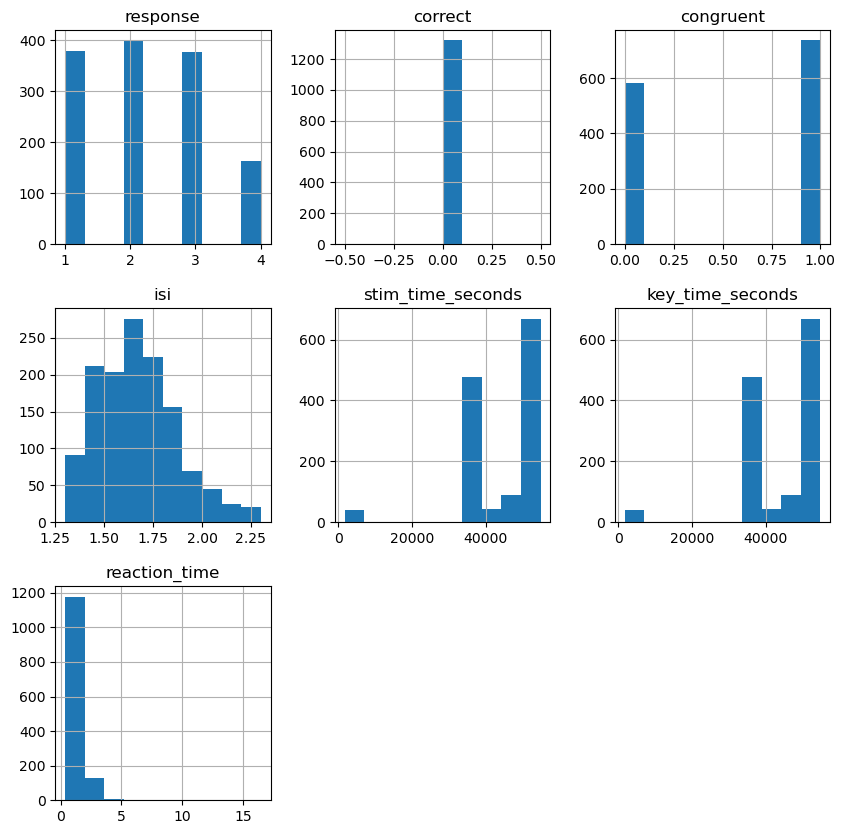

In [129]:
augmented_df.hist(bins=10, figsize=(10, 10))
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/anaconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/anaconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


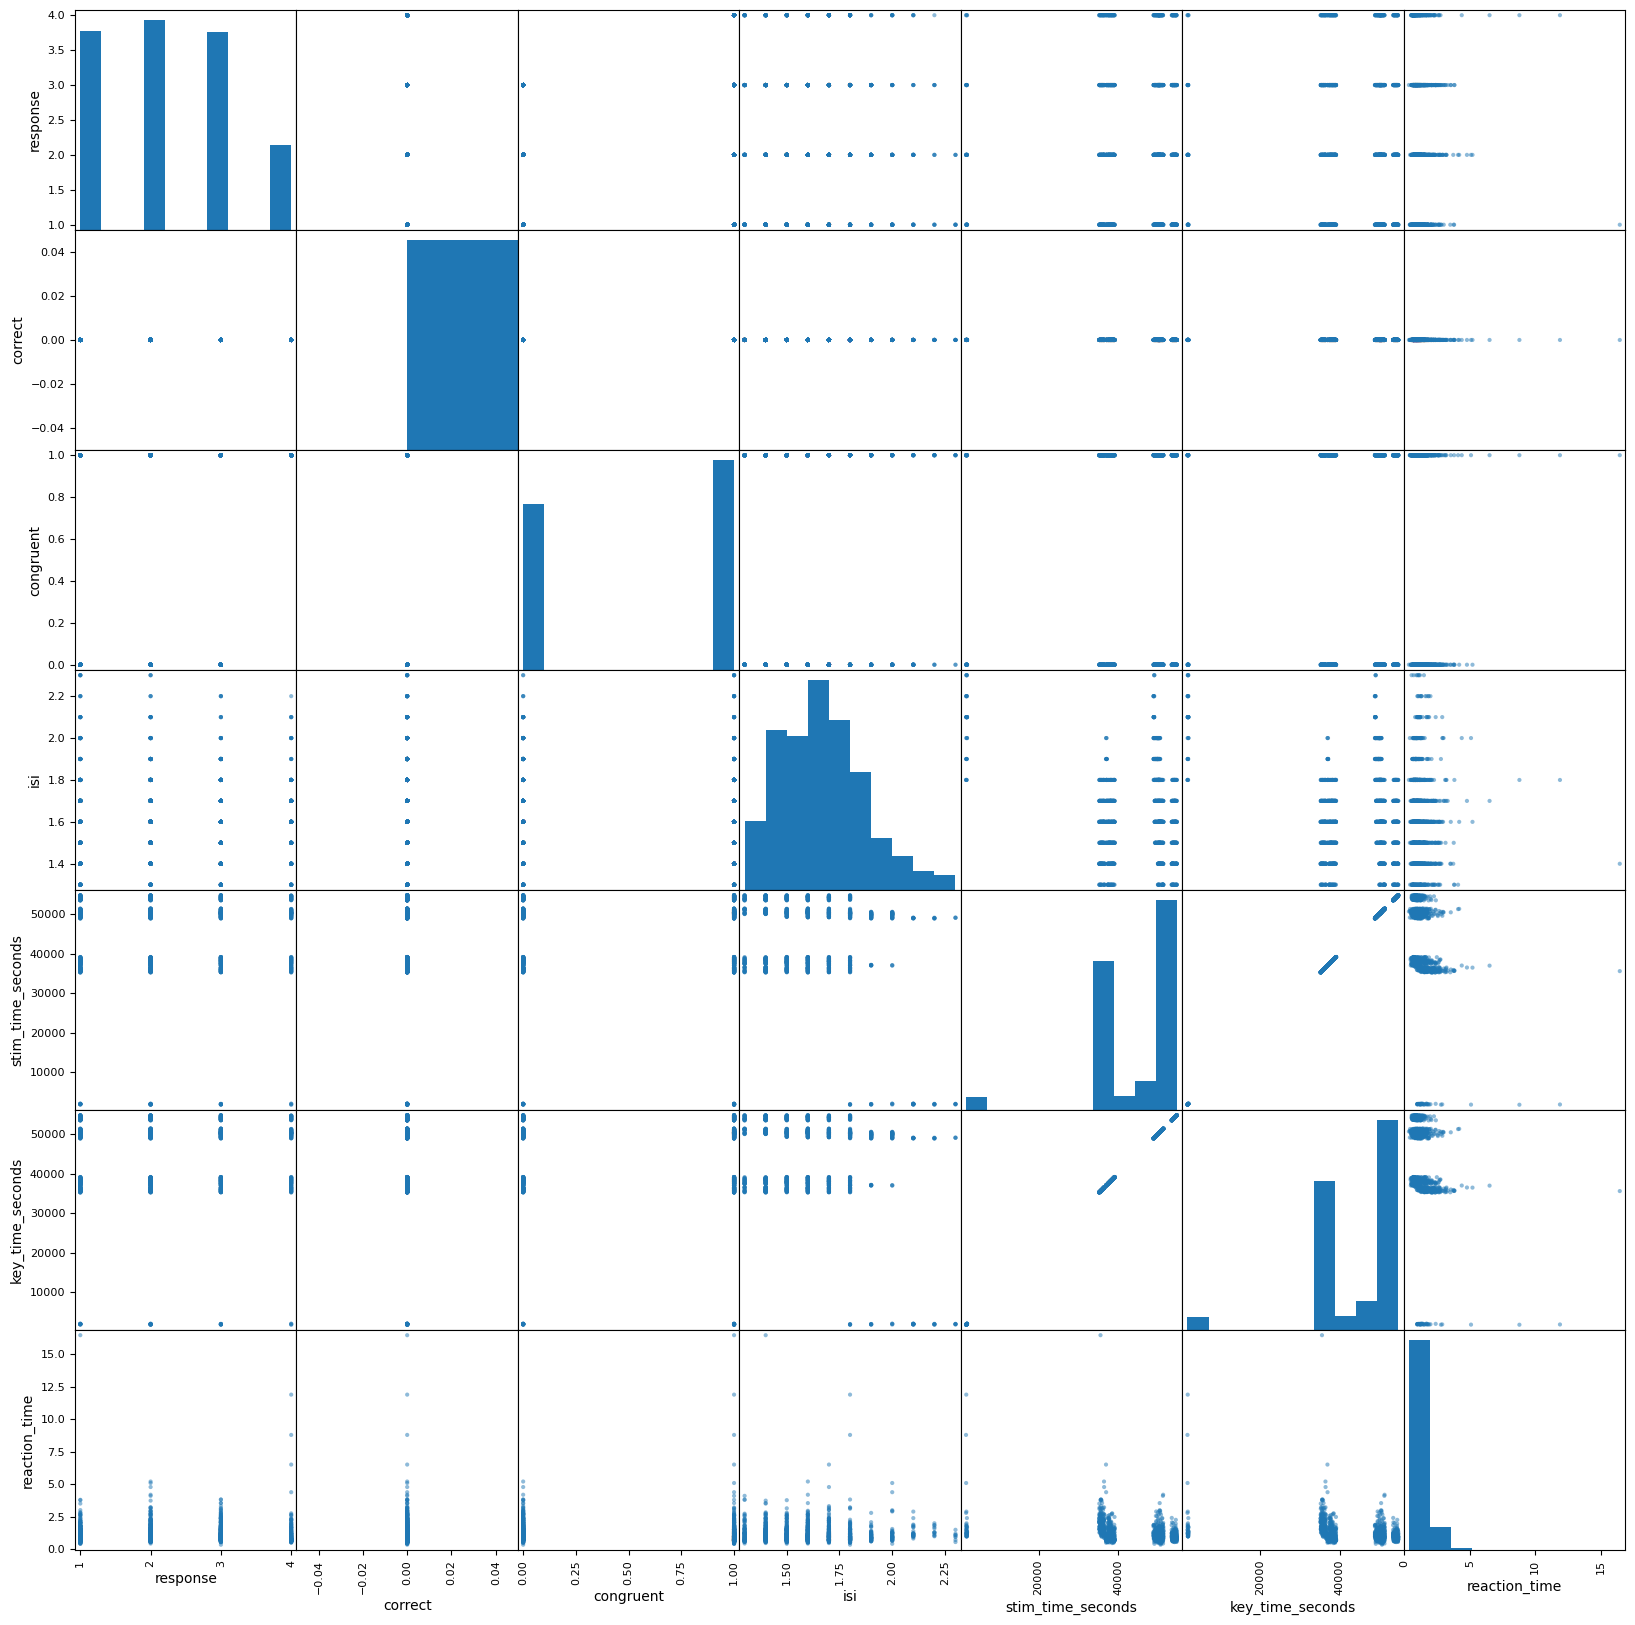

In [130]:
from pandas.plotting import scatter_matrix
scatter_matrix(augmented_df, figsize = (20, 20));

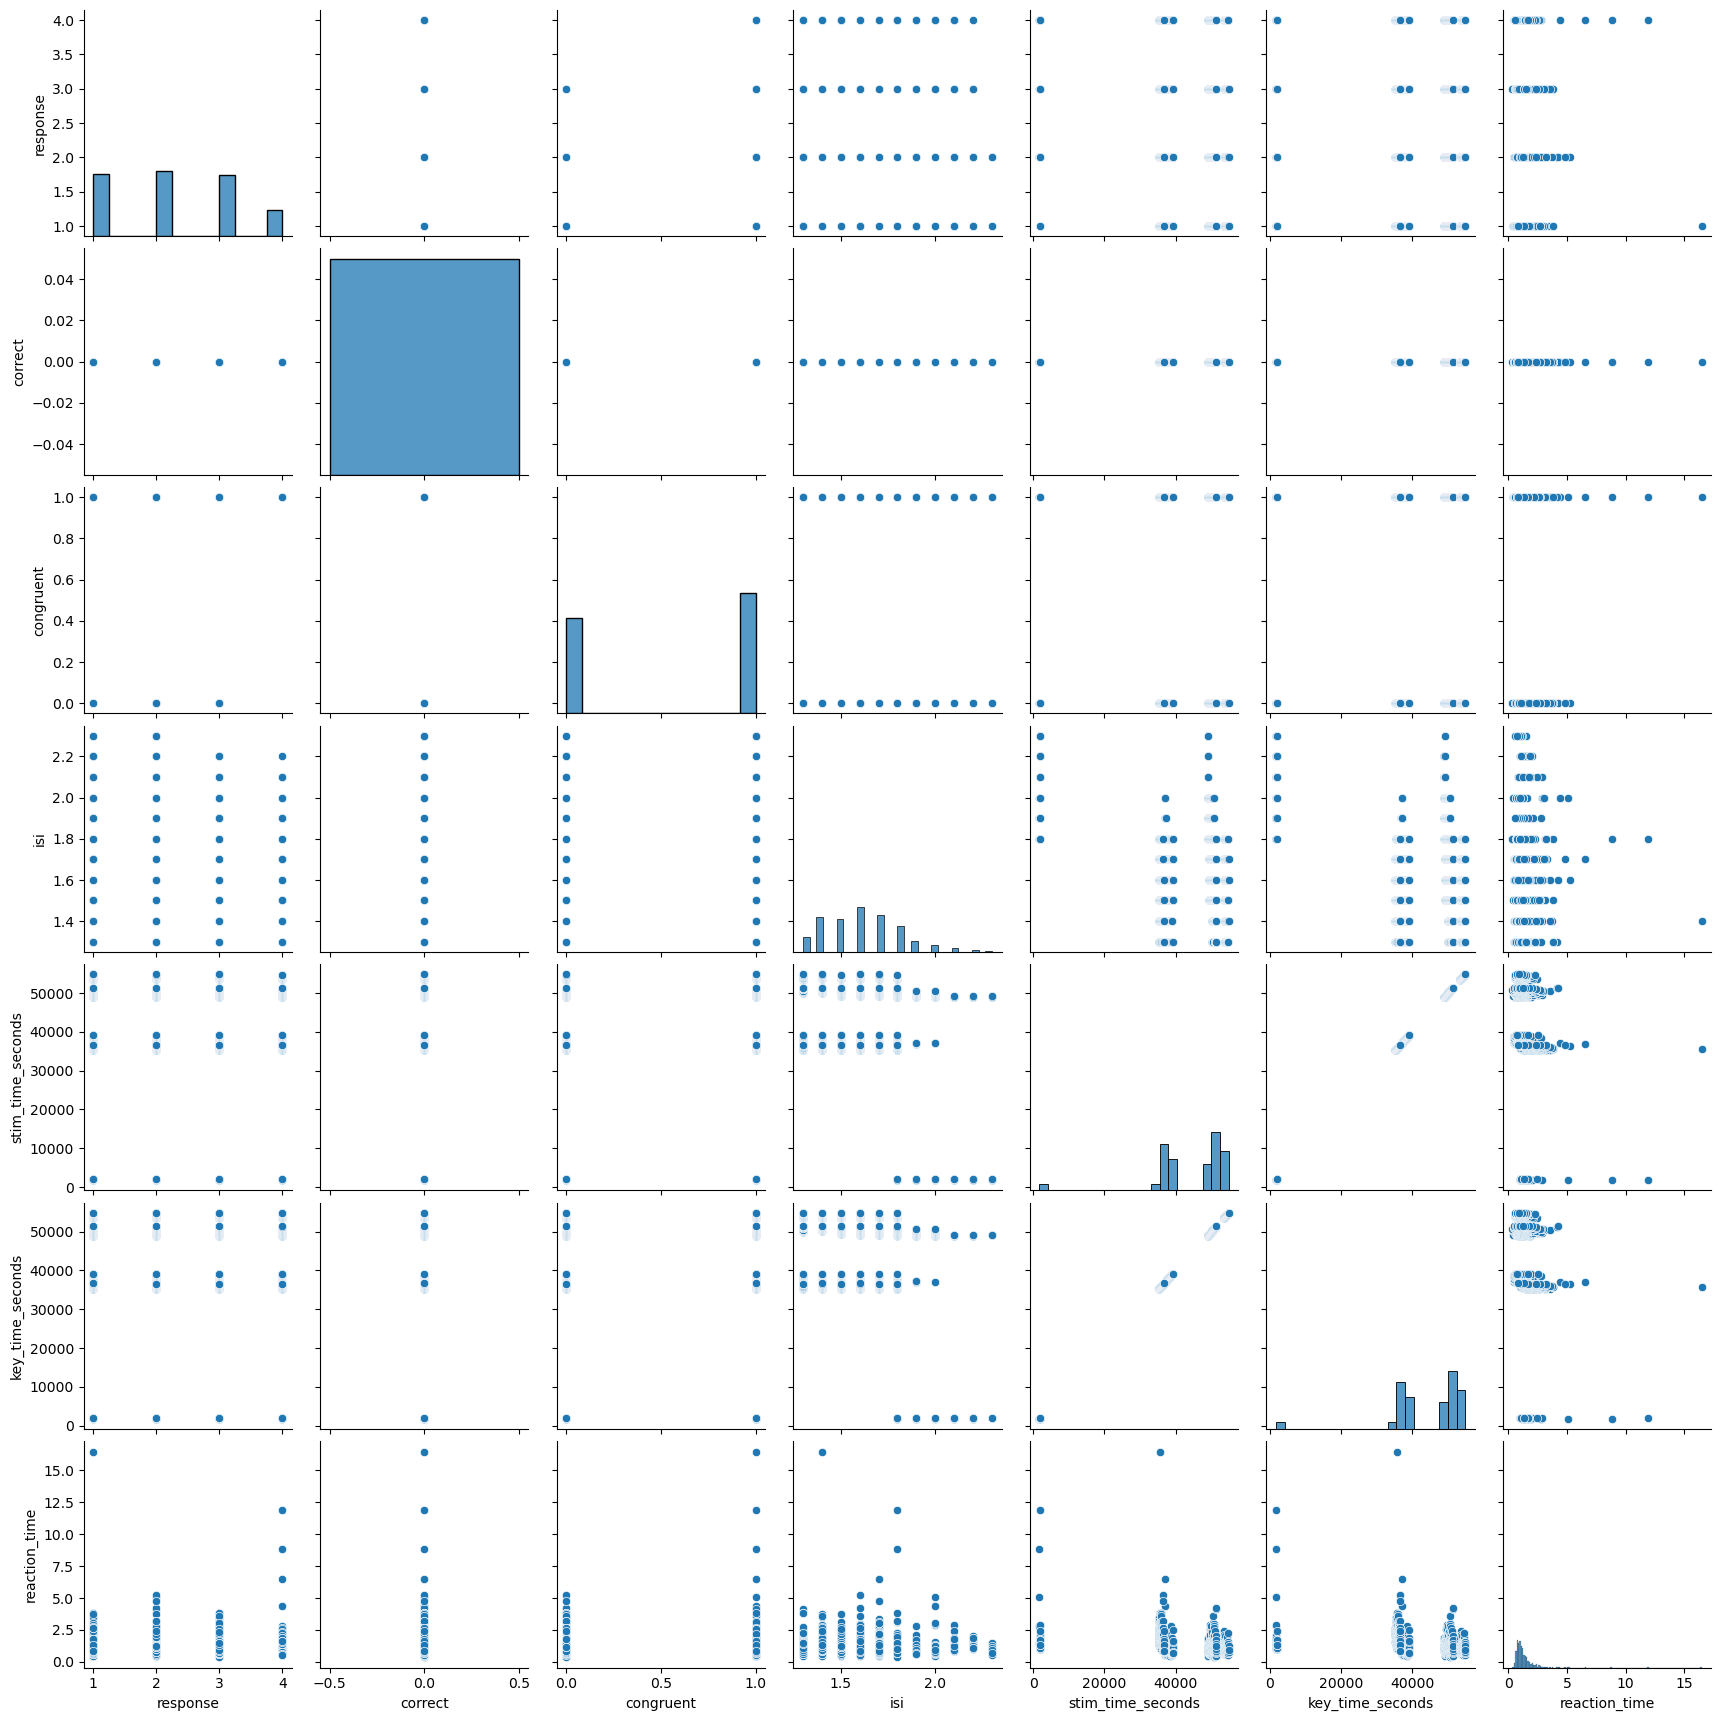

In [131]:
#Pairplot
sns.pairplot(data=augmented_df)
plt.show()

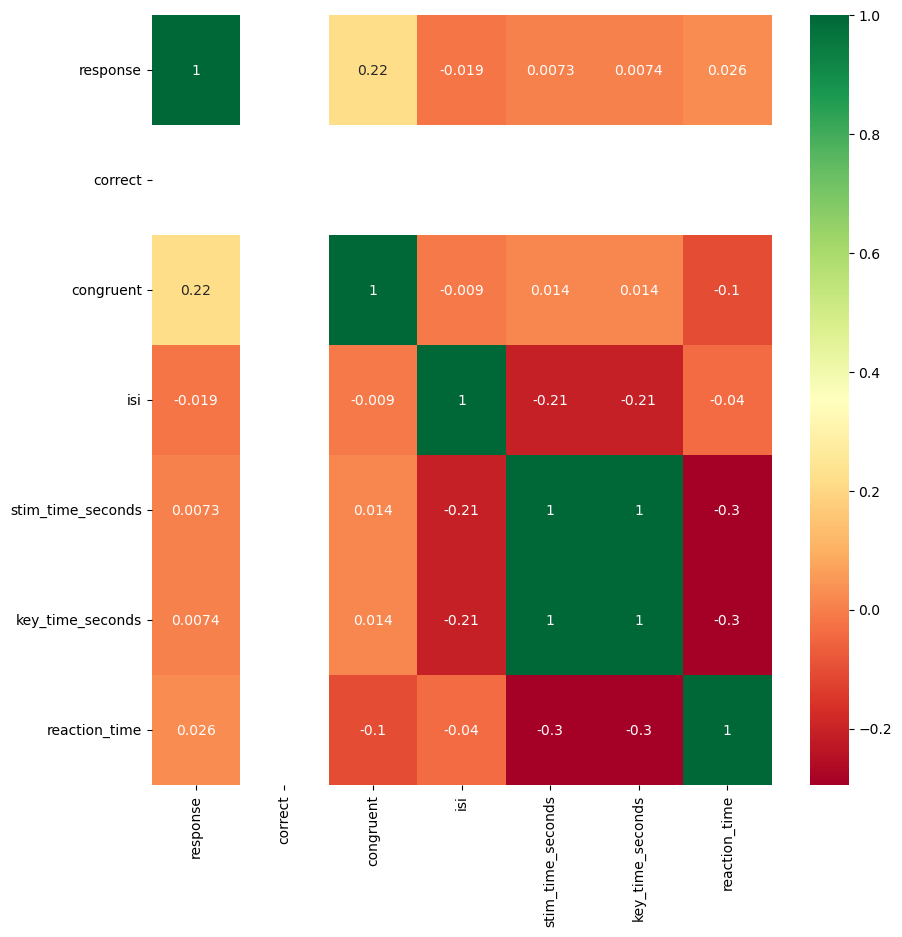

In [132]:
#Correlation Analysis/Relationships between variables using seaborn library
corrmat = augmented_df.corr(numeric_only=True)
top_corr_features = corrmat.index
plt.figure(figsize = (10, 10))
#plot heat map
g=sns.heatmap(augmented_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Train-Test Split

In [133]:
#Split df into X and Y
target_name = 'congruent'

#Separate object for target feature
Y = augmented_df[target_name]

#Separate Object for Input Features
X = augmented_df.drop(['color', 'word', 'response', 'correct', 'congruent', 'stim_time', 'key_time', 'isi', 'start_experiment', 'end_experiment'], axis=1)

In [134]:
#Apply feature scaling
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

In [135]:
#TRAIN-TEST-SPLIT
X_train, X_test, y_train, y_test = train_test_split(SSX, Y, test_size= 0.2, random_state=7)

# Gaussian Naive Bayes

Confusion matrix:
Axes(0.125,0.11;0.62x0.77)

Train score : 0.553030303030303
Test/Accuracy score : 0.5871212121212122


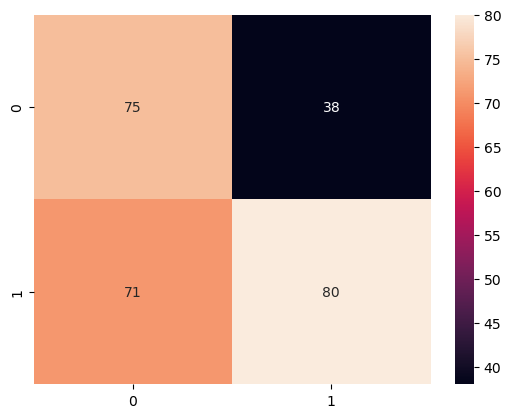

In [136]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

gb_pred = nb.predict(X_test)

cm = sns.heatmap(confusion_matrix(y_test, gb_pred), annot = True, fmt="d")

print(f"Confusion matrix:\n{cm}\n")
print(f"Train score : {nb.score(X_train, y_train)}\nTest/Accuracy score : {nb.score(X_test, y_test)}")

# Support Vector Machine

Confusion matrix:
Axes(0.125,0.11;0.62x0.77)

Train score : 0.6070075757575758
Test/Accuracy score : 0.6098484848484849


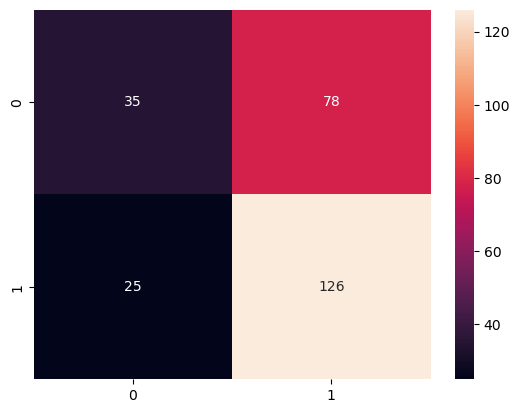

In [137]:
#SVM
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, y_train)

svm_pred = sv.predict(X_test)

cm = sns.heatmap(confusion_matrix(y_test, svm_pred), annot = True, fmt="d")

print(f"Confusion matrix:\n{cm}\n")


print(f"Train score : {sv.score(X_train, y_train)}\nTest/Accuracy score : {sv.score(X_test, y_test)}")


# Multi-Layer Perceptron

Confusion matrix:
Axes(0.125,0.11;0.62x0.77)

Train score : 0.5729166666666666
Test/Accuracy score : 0.571969696969697


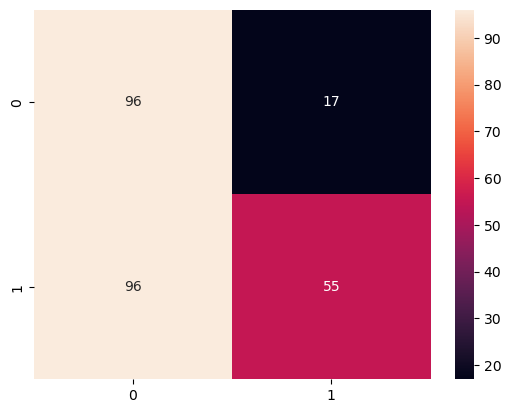

In [138]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)

cm = sns.heatmap(confusion_matrix(y_test, nn_pred), annot = True, fmt="d")

print(f"Confusion matrix:\n{cm}\n")


print(f"Train score : {nn.score(X_train, y_train)}\nTest/Accuracy score : {nn.score(X_test, y_test)}")


# Cross Validation

In [139]:
from sklearn.model_selection import cross_val_score

#Gaussian Naive Bayes
nb_cv = GaussianNB()
scores_nb = cross_val_score(nb_cv, X_train, y_train, cv = 5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_nb.mean(), scores_nb.std()))

#Support Vector Machine
svm_cv = SVC()
scores_sv = cross_val_score(svm_cv, X_train, y_train, cv = 5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_sv.mean(), scores_sv.std()))

#Multi-layer Perceptron
nn_cv = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
scores_nn = cross_val_score(nn_cv, X_train, y_train, cv = 5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_nn.mean(), scores_nn.std()))

0.53 accuracy with a standard deviation of 0.04
0.58 accuracy with a standard deviation of 0.01
0.55 accuracy with a standard deviation of 0.01


# K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter=300, n_init=10, random_state=0)

model = kmeans.fit(X)
labels = kmeans.labels_
# Add the cluster labels to the original dataframe
augmented_df['Cluster'] = labels

augmented_df.head()

fig = plt.figure(figsize = (10, 5))
# creating the bar plot
#plt.bar(augmented_df['Cluster'], augmented_df['reaction_time'], color ='maroon', width = 0.4)

#plt.xlabel("Courses offered")
#plt.ylabel("No. of students enrolled")
#plt.title("Students enrolled in different courses")
#plt.show()

plt.scatter(augmented_df['Cluster'], augmented_df['reaction_time'], c=augmented_df['Cluster'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Reaction Time (s)')
plt.title('K-means Clustering')
plt.show()

In [ ]:
augmented_df.drop('Cluster', axis=1)
augmented_df.head()

,color,word,response,correct,congruent,stim_time,key_time,isi,start_experiment,end_experiment,stim_time_seconds,key_time_seconds,reaction_time,Cluster
0,black,black,4,0,1,29:32.9,29:41.7,1.8,NaN,NaN,1772.9,1781.7,8.8,1
1,blue,blue,3,0,1,29:46.2,29:49.0,1.9,NaN,NaN,1786.2,1789.0,2.8,1
2,green,blue,2,0,0,29:53.6,29:55.1,1.8,NaN,NaN,1793.6,1795.1,1.5,1
3,black,black,2,0,1,29:59.6,30:04.7,2.0,NaN,NaN,1799.6,1804.7,5.1,1
4,blue,blue,3,0,1,30:09.4,30:11.1,2.2,NaN,NaN,1809.4,1811.1,1.7,1


# Patient 8

In [ ]:
df_pt8['stim_time_seconds'] = df_pt8['stim_time'].apply(time_string_to_seconds)
df_pt8['stim_time_seconds'] = df_pt8['stim_time_seconds'].astype('float64')
df_pt8['key_time_seconds'] = df_pt8['key_time'].apply(time_string_to_seconds)
df_pt8['key_time_seconds'] = df_pt8['key_time_seconds'].astype('float64')

df_pt8['reaction_time'] = df_pt8['key_time_seconds'] - df_pt8['stim_time_seconds']
df_pt8['reaction_time'] = df_pt8['reaction_time'].astype('float64')

x = df_pt8.drop(['Unnamed: 0', 'color', 'word', 'response', 'correct', 'stim_time', 'key_time', 'isi', 'start_experiment', 'end_experiment', 'congruent'], axis=1)
y = df_pt8.drop(['Unnamed: 0', 'color', 'word', 'response', 'correct', 'stim_time', 'key_time', 'isi', 'start_experiment', 'end_experiment', 'stim_time_seconds', 'key_time_seconds', 'reaction_time'], axis=1)

Gaussian Naive Bayes Testing on Patient 8

Confusion matrix:
Axes(0.125,0.11;0.62x0.77)

Test/Accuracy score : 0.440625


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


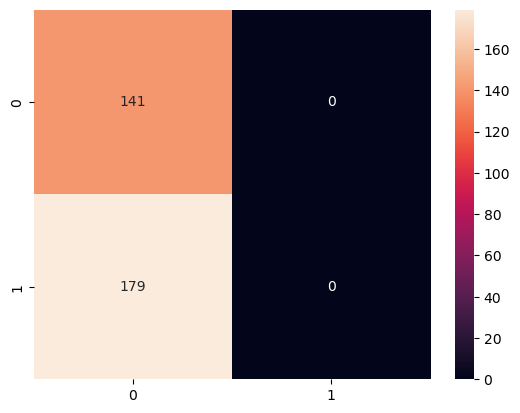

In [ ]:
gb_pred = nb.predict(x)

cm = sns.heatmap(confusion_matrix(y, gb_pred), annot = True, fmt="d")

print(f"Confusion matrix:\n{cm}\n")
print(f"Test/Accuracy score : {nb.score(x, y)}")

Support Vector Machine Testing on Patient 8

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Confusion matrix:
Axes(0.125,0.11;0.62x0.77)

Test/Accuracy score : 0.559375


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


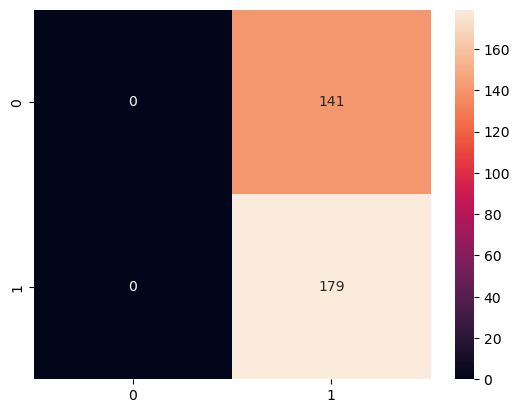

In [ ]:
sv_pred = sv.predict(x)

cm = sns.heatmap(confusion_matrix(y, sv_pred), annot = True, fmt="d")

print(f"Confusion matrix:\n{cm}\n")
print(f"Test/Accuracy score : {sv.score(x, y)}")

Multi-Layer Perceptron

Confusion matrix:
Axes(0.125,0.11;0.62x0.77)

Test/Accuracy score : 0.559375


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


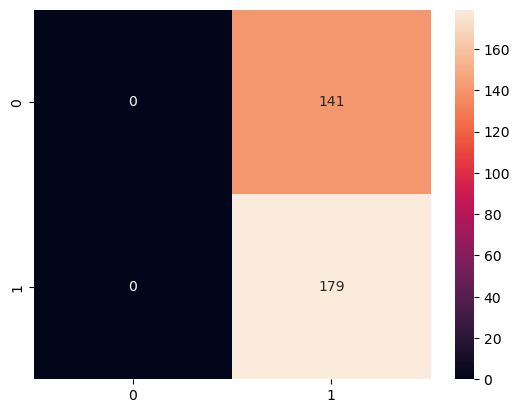

In [ ]:
nn_pred = nn.predict(x)

cm = sns.heatmap(confusion_matrix(y, nn_pred), annot = True, fmt="d")

print(f"Confusion matrix:\n{cm}\n")
print(f"Test/Accuracy score : {nn.score(x, y)}")

# Patient 9

In [ ]:
df_pt9['stim_time_seconds'] = df_pt9['stim_time'].apply(time_string_to_seconds)
df_pt9['stim_time_seconds'] = df_pt9['stim_time_seconds'].astype('float64')
df_pt9['key_time_seconds'] = df_pt9['key_time'].apply(time_string_to_seconds)
df_pt9['key_time_seconds'] = df_pt9['key_time_seconds'].astype('float64')

df_pt9['reaction_time'] = df_pt9['key_time_seconds'] - df_pt9['stim_time_seconds']
df_pt9['reaction_time'] = df_pt9['reaction_time'].astype('float64')

x = df_pt9.drop(['Unnamed: 0', 'color', 'word', 'response', 'correct', 'stim_time', 'key_time', 'isi', 'start_experiment', 'end_experiment', 'congruent'], axis=1)
y = df_pt9.drop(['Unnamed: 0', 'color', 'word', 'response', 'correct', 'stim_time', 'key_time', 'isi', 'start_experiment', 'end_experiment', 'stim_time_seconds', 'key_time_seconds', 'reaction_time'], axis=1)

Gaussian Naive Bayes Testing on Patient 9

Confusion matrix:
Axes(0.125,0.11;0.62x0.77)

Test/Accuracy score : 0.45625


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


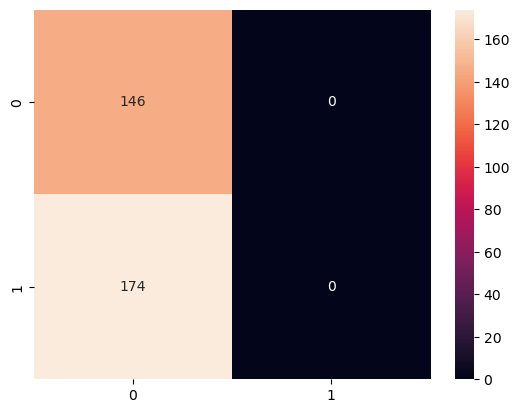

In [ ]:
gb_pred = nb.predict(x)

cm = sns.heatmap(confusion_matrix(y, gb_pred), annot = True, fmt="d")

print(f"Confusion matrix:\n{cm}\n")
print(f"Test/Accuracy score : {nb.score(x, y)}")

Support Vector Machine Testing on Patient 9

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Confusion matrix:
Axes(0.125,0.11;0.62x0.77)

Test/Accuracy score : 0.54375


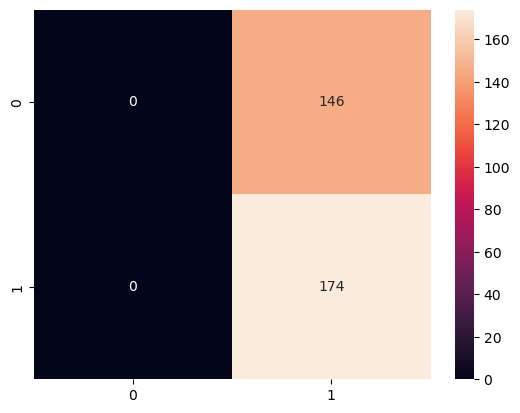

In [ ]:
sv_pred = sv.predict(x)

cm = sns.heatmap(confusion_matrix(y, sv_pred), annot = True, fmt="d")

print(f"Confusion matrix:\n{cm}\n")
print(f"Test/Accuracy score : {sv.score(x, y)}")

Multi-Layer Perceptron Testing on Patient 9

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Confusion matrix:
Axes(0.125,0.11;0.62x0.77)

Test/Accuracy score : 0.54375


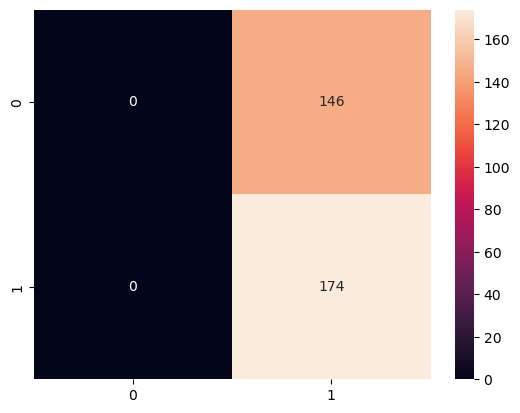

In [ ]:
nn_pred = nn.predict(x)

cm = sns.heatmap(confusion_matrix(y, nn_pred), annot = True, fmt="d")

print(f"Confusion matrix:\n{cm}\n")
print(f"Test/Accuracy score : {nn.score(x, y)}")

# Patient 10

In [ ]:
df_pt10['stim_time_seconds'] = df_pt10['stim_time'].apply(time_string_to_seconds)
df_pt10['stim_time_seconds'] = df_pt10['stim_time_seconds'].astype('float64')
df_pt10['key_time_seconds'] = df_pt10['key_time'].apply(time_string_to_seconds)
df_pt10['key_time_seconds'] = df_pt10['key_time_seconds'].astype('float64')

df_pt10['reaction_time'] = df_pt10['key_time_seconds'] - df_pt10['stim_time_seconds']
df_pt10['reaction_time'] = df_pt10['reaction_time'].astype('float64')

x = df_pt10.drop(['Unnamed: 0', 'color', 'word', 'response', 'correct', 'stim_time', 'key_time', 'isi', 'start_experiment', 'end_experiment', 'congruent'], axis=1)
y = df_pt10.drop(['Unnamed: 0', 'color', 'word', 'response', 'correct', 'stim_time', 'key_time', 'isi', 'start_experiment', 'end_experiment', 'stim_time_seconds', 'key_time_seconds', 'reaction_time'], axis=1)

Gaussian Naive Bayes Testing on Patient 10

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Confusion matrix:
Axes(0.125,0.11;0.62x0.77)

Test/Accuracy score : 0.4375


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


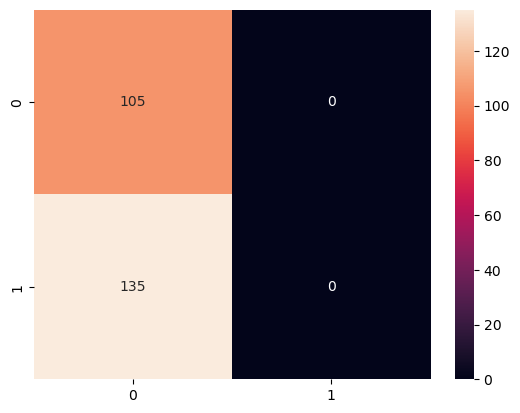

In [ ]:
gb_pred = nb.predict(x)

cm = sns.heatmap(confusion_matrix(y, gb_pred), annot = True, fmt="d")

print(f"Confusion matrix:\n{cm}\n")
print(f"Test/Accuracy score : {nb.score(x, y)}")

Support Vector Machine Testing on Patient 10

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Confusion matrix:
Axes(0.125,0.11;0.62x0.77)

Test/Accuracy score : 0.5625


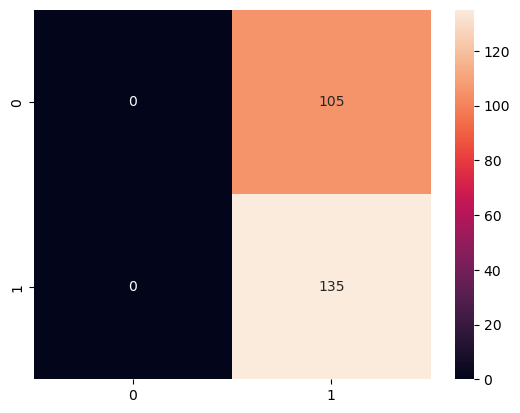

In [ ]:
sv_pred = sv.predict(x)

cm = sns.heatmap(confusion_matrix(y, sv_pred), annot = True, fmt="d")

print(f"Confusion matrix:\n{cm}\n")
print(f"Test/Accuracy score : {sv.score(x, y)}")

Multi-Layer Perceptron Testing on Patient 10

Confusion matrix:
Axes(0.125,0.11;0.62x0.77)

Test/Accuracy score : 0.5625


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


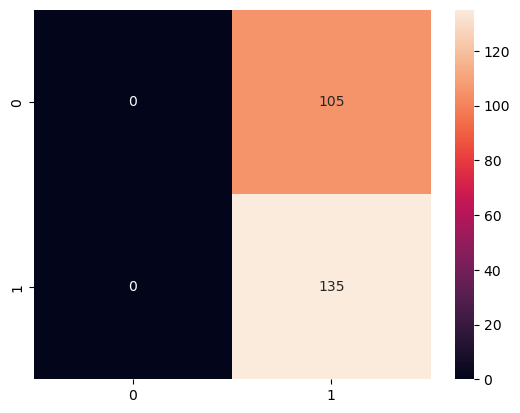

In [ ]:
nn_pred = nn.predict(x)

cm = sns.heatmap(confusion_matrix(y, nn_pred), annot = True, fmt="d")

print(f"Confusion matrix:\n{cm}\n")
print(f"Test/Accuracy score : {nn.score(x, y)}")

# Patient 11

In [ ]:
df_pt11['stim_time_seconds'] = df_pt11['stim_time'].apply(time_string_to_seconds)
df_pt11['stim_time_seconds'] = df_pt11['stim_time_seconds'].astype('float64')
df_pt11['key_time_seconds'] = df_pt11['key_time'].apply(time_string_to_seconds)
df_pt11['key_time_seconds'] = df_pt11['key_time_seconds'].astype('float64')

df_pt11['reaction_time'] = df_pt11['key_time_seconds'] - df_pt11['stim_time_seconds']
df_pt11['reaction_time'] = df_pt11['reaction_time'].astype('float64')

x = df_pt11.drop(['Unnamed: 0', 'color', 'word', 'response', 'correct', 'stim_time', 'key_time', 'isi', 'start_experiment', 'end_experiment', 'congruent'], axis=1)
y = df_pt11.drop(['Unnamed: 0', 'color', 'word', 'response', 'correct', 'stim_time', 'key_time', 'isi', 'start_experiment', 'end_experiment', 'stim_time_seconds', 'key_time_seconds', 'reaction_time'], axis=1)

Gaussian Naive Bayes Testing on Patient 11

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Confusion matrix:
Axes(0.125,0.11;0.62x0.77)

Test/Accuracy score : 0.4375


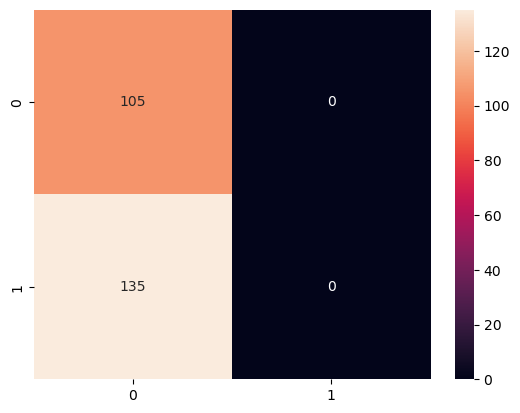

In [ ]:
gb_pred = nb.predict(x)

cm = sns.heatmap(confusion_matrix(y, gb_pred), annot = True, fmt="d")

print(f"Confusion matrix:\n{cm}\n")
print(f"Test/Accuracy score : {nb.score(x, y)}")

Support Vector Machine Testing on Patient 11

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Confusion matrix:
Axes(0.125,0.11;0.62x0.77)

Test/Accuracy score : 0.5625


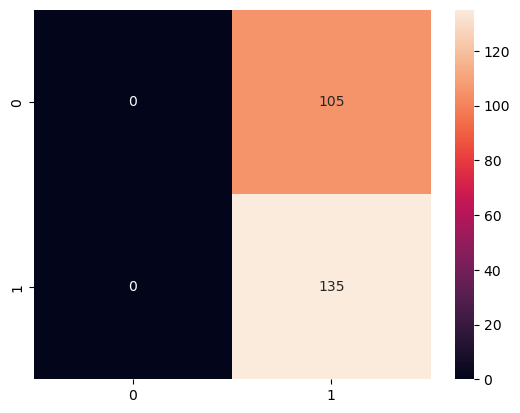

In [ ]:
sv_pred = sv.predict(x)

cm = sns.heatmap(confusion_matrix(y, sv_pred), annot = True, fmt="d")

print(f"Confusion matrix:\n{cm}\n")
print(f"Test/Accuracy score : {sv.score(x, y)}")

Multi-Layer Perceptron Testing on Patient 11

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Confusion matrix:
Axes(0.125,0.11;0.62x0.77)

Test/Accuracy score : 0.5625


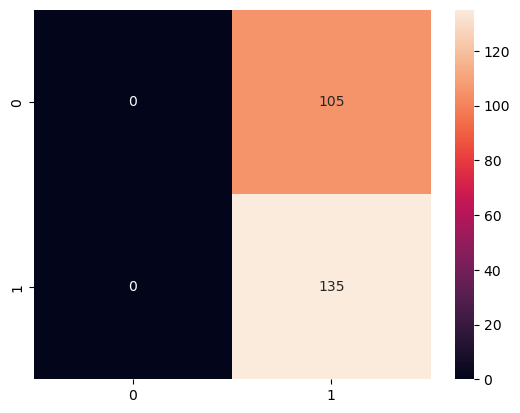

In [ ]:
nn_pred = nn.predict(x)

cm = sns.heatmap(confusion_matrix(y, nn_pred), annot = True, fmt="d")

print(f"Confusion matrix:\n{cm}\n")
print(f"Test/Accuracy score : {nn.score(x, y)}")

# Patient 12

In [ ]:
df_pt12['stim_time_seconds'] = df_pt12['stim_time'].apply(time_string_to_seconds)
df_pt12['stim_time_seconds'] = df_pt12['stim_time_seconds'].astype('float64')
df_pt12['key_time_seconds'] = df_pt12['key_time'].apply(time_string_to_seconds)
df_pt12['key_time_seconds'] = df_pt12['key_time_seconds'].astype('float64')

df_pt12['reaction_time'] = df_pt12['key_time_seconds'] - df_pt12['stim_time_seconds']
df_pt12['reaction_time'] = df_pt12['reaction_time'].astype('float64')

x = df_pt12.drop(['Unnamed: 0', 'color', 'word', 'response', 'correct', 'stim_time', 'key_time', 'isi', 'start_experiment', 'end_experiment', 'congruent'], axis=1)
y = df_pt12.drop(['Unnamed: 0', 'color', 'word', 'response', 'correct', 'stim_time', 'key_time', 'isi', 'start_experiment', 'end_experiment', 'stim_time_seconds', 'key_time_seconds', 'reaction_time'], axis=1)

Gaussian Naive Bayes Testing on Patient 12

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Confusion matrix:
Axes(0.125,0.11;0.62x0.77)

Test/Accuracy score : 0.435


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


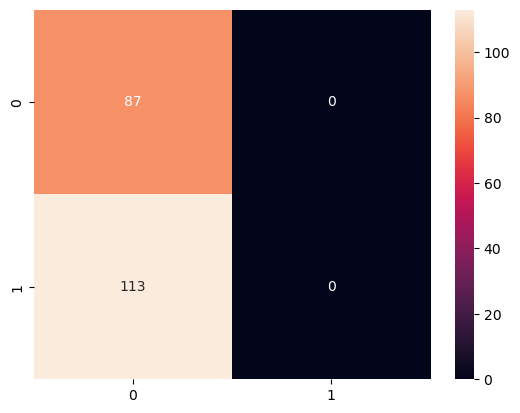

In [ ]:
gb_pred = nb.predict(x)

cm = sns.heatmap(confusion_matrix(y, gb_pred), annot = True, fmt="d")

print(f"Confusion matrix:\n{cm}\n")
print(f"Test/Accuracy score : {nb.score(x, y)}")

Support Vector Machine Testing on Patient 12

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Confusion matrix:
Axes(0.125,0.11;0.62x0.77)

Test/Accuracy score : 0.565


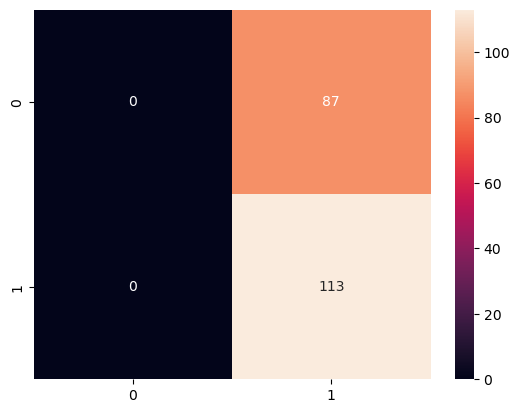

In [ ]:
sv_pred = sv.predict(x)

cm = sns.heatmap(confusion_matrix(y, sv_pred), annot = True, fmt="d")

print(f"Confusion matrix:\n{cm}\n")
print(f"Test/Accuracy score : {sv.score(x, y)}")

Multi-Layer Perceptron Testing on Patient 12

Confusion matrix:
Axes(0.125,0.11;0.62x0.77)

Test/Accuracy score : 0.565


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


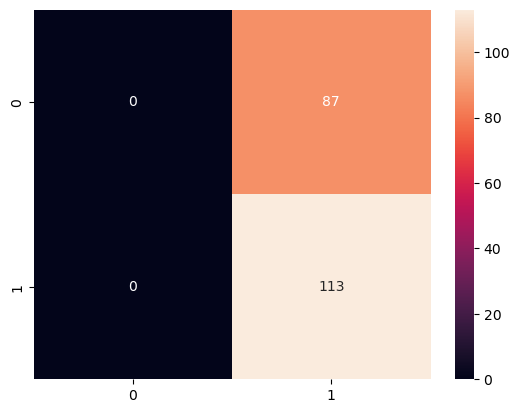

In [ ]:
nn_pred = nn.predict(x)

cm = sns.heatmap(confusion_matrix(y, nn_pred), annot = True, fmt="d")

print(f"Confusion matrix:\n{cm}\n")
print(f"Test/Accuracy score : {nn.score(x, y)}")